In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from random import seed,sample,randrange
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [3]:
m1 = [0, 0, 0]
m2 = [0, 1, 0]
m3 = [-1, 0, 1]
m4 = [0, 0.5, 1]
cov1 = [[1, 0, 0],[0, 1, 0],[0, 0, 1]]
cov2 = [[1, 0, 1],[0, 2, 2],[1, 2, 5]]
cov3 = [[2, 0, 0],[0, 6, 0],[0, 0, 1]]
cov4 = [[2, 0, 0],[0, 1, 0],[0, 0, 3]]

In [4]:
x1=pd.DataFrame(np.random.multivariate_normal(m1, cov1, 1000),columns=list('ABC'))
x1['y']=1
x2=pd.DataFrame(np.random.multivariate_normal(m2, cov2, 1000),columns=list('ABC'))
x2['y']=2
x3=pd.DataFrame(np.random.multivariate_normal(m3, cov3, 1000),columns=list('ABC'))
x3['y']=3
x4=pd.DataFrame(np.random.multivariate_normal(m4, cov4, 1000),columns=list('ABC'))
x4['y']=4



In [5]:
data=x1
data=data.append(x2,ignore_index=True)
data=data.append(x3,ignore_index=True)
data=data.append(x4,ignore_index=True)

In [6]:
X=data.drop('y',axis=1)
y=data['y']

In [7]:
from keras.utils import to_categorical
y = to_categorical(y)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
model = Sequential()
model.add(Dense(3, input_dim=3, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(5, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])

In [11]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 25        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=150, batch_size=256)

Train on 2680 samples, validate on 1320 samples
Epoch 1/150
2680/2680 [==============================] - 1s 324us/step - loss: 1.5929 - accuracy: 0.2955 - val_loss: 1.5631 - val_accuracy: 0.3462
Epoch 2/150
2680/2680 [==============================] - 0s 18us/step - loss: 1.5397 - accuracy: 0.3563 - val_loss: 1.4998 - val_accuracy: 0.3727
Epoch 3/150
2680/2680 [==============================] - 0s 19us/step - loss: 1.4587 - accuracy: 0.3806 - val_loss: 1.3961 - val_accuracy: 0.3765
Epoch 4/150
2680/2680 [==============================] - 0s 20us/step - loss: 1.3615 - accuracy: 0.3843 - val_loss: 1.3026 - val_accuracy: 0.3947
Epoch 5/150
2680/2680 [==============================] - 0s 24us/step - loss: 1.2912 - accuracy: 0.3978 - val_loss: 1.2527 - val_accuracy: 0.3886
Epoch 6/150
2680/2680 [==============================] - 0s 25us/step - loss: 1.2585 - accuracy: 0.3989 - val_loss: 1.2363 - val_accuracy: 0.3924
Epoch 7/150
2680/2680 [==============================] - 0s 23us/step - los

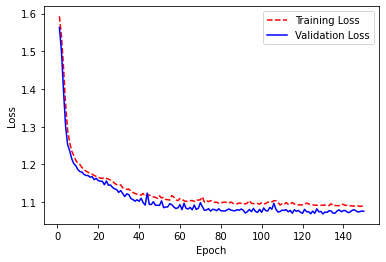

In [13]:
import matplotlib.pyplot as plt


epoch_count = range(1, len(history.history['loss']) + 1)


plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [14]:
pd.DataFrame([[0,0,0],[-0.5,-0.5,0],[-1,0,0]])

,0,1,2
0,0.0,0.0,0
1,-0.5,-0.5,0
2,-1.0,0.0,0


In [21]:
y_pred=model.predict_classes(pd.DataFrame([[0,0,0],[-0.5,-0.5,0],[-1,0,0]]))

In [22]:
y_pred

array([1, 1, 1])